In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df_covid = pd.read_csv("data/donnes-hospitalieres-covid19.csv", sep=";", header=0, parse_dates = ['jour'])

In [19]:
df_covid

,dep,sexe,jour,hosp,rea,rad,dc
0,01,0,2020-03-18,2,0,1,0
1,01,1,2020-03-18,1,0,1,0
2,01,2,2020-03-18,1,0,0,0
3,02,0,2020-03-18,41,10,18,11
4,02,1,2020-03-18,19,4,11,6
...,...,...,...,...,...,...,...
18481,974,1,2020-05-18,10,4,56,0
18482,974,2,2020-05-18,2,0,59,0
18483,976,0,2020-05-18,55,10,178,18
18484,976,1,2020-05-18,31,4,87,12


In [20]:
df_covid.shape

(18486, 7)

In [21]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18486 entries, 0 to 18485
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dep     18483 non-null  object        
 1   sexe    18486 non-null  int64         
 2   jour    18486 non-null  datetime64[ns]
 3   hosp    18486 non-null  int64         
 4   rea     18486 non-null  int64         
 5   rad     18486 non-null  int64         
 6   dc      18486 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1011.1+ KB


In [28]:
df_covid[(df_covid.sexe == 1) | (df_covid.sexe == 2)].index

Int64Index([    1,     2,     4,     5,     7,     8,    10,    11,    13,
               14,
            ...
            18472, 18473, 18475, 18476, 18478, 18479, 18481, 18482, 18484,
            18485],
           dtype='int64', length=12324)

In [30]:
# drop rows where sex=1 or sex=2 
# keep sex=0 which means both male and female

df_covid = df_covid.drop(df_covid[(df_covid.sexe == 1) | (df_covid.sexe == 2)].index)
df_covid

,dep,sexe,jour,hosp,rea,rad,dc
0,01,0,2020-03-18,2,0,1,0
3,02,0,2020-03-18,41,10,18,11
6,03,0,2020-03-18,4,0,1,0
9,04,0,2020-03-18,3,1,2,0
12,05,0,2020-03-18,8,1,9,0
...,...,...,...,...,...,...,...
18471,971,0,2020-05-18,14,3,72,19
18474,972,0,2020-05-18,19,5,80,14
18477,973,0,2020-05-18,14,0,45,1
18480,974,0,2020-05-18,12,4,115,0


In [35]:
# delete "sex" column which is of no interest here 
del df_covid['sexe']
df_covid

,dep,jour,hosp,rea,rad,dc
0,01,2020-03-18,2,0,1,0
3,02,2020-03-18,41,10,18,11
6,03,2020-03-18,4,0,1,0
9,04,2020-03-18,3,1,2,0
12,05,2020-03-18,8,1,9,0
...,...,...,...,...,...,...
18471,971,2020-05-18,14,3,72,19
18474,972,2020-05-18,19,5,80,14
18477,973,2020-05-18,14,0,45,1
18480,974,2020-05-18,12,4,115,0


In [42]:
# sum number of people (hospitalized, in intensive care, returning home, deceased) 
# in every department for each day 
# to get the total number of people infected with covid in France
df_covid = df_covid.groupby('jour').agg({'hosp': "sum",'rea': "sum",'rad': "sum", 'dc': "sum"})

In [43]:
df_covid

,hosp,rea,rad,dc
jour,,,,
2020-03-18,2972,771,816,218
2020-03-19,4073,1002,1180,327
2020-03-20,5226,1297,1587,450
2020-03-21,5900,1453,1811,525
2020-03-22,6954,1674,2117,632
...,...,...,...,...
2020-05-13,21009,2385,58664,17082
2020-05-15,19801,2162,60439,17323
2020-05-16,19372,2091,61057,17393


In [44]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2020-03-18 to 2020-05-18
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hosp    61 non-null     int64
 1   rea     61 non-null     int64
 2   rad     61 non-null     int64
 3   dc      61 non-null     int64
dtypes: int64(4)
memory usage: 2.4 KB


In [48]:
df_covid.columns

Index(['hospitalisés', 'en réanimation', 'retour au domicile', 'décédés'], dtype='object')

In [54]:
df_covid.columns = ['hospitalized', 'in intensive care', 'returning home', 'deceased']

In [55]:
df_covid.columns

Index(['hospitalized', 'in intensive care', 'returning home', 'deceased'], dtype='object')

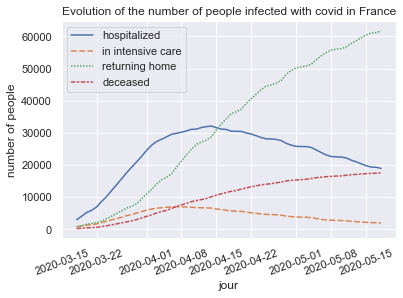

In [56]:
sns.set(style="darkgrid")
sns.lineplot(data=df_covid)
plt.ylabel('number of people')
plt.xticks(rotation=20)
plt.title('Evolution of the number of people infected with covid in France')
plt.savefig('images/covid.pdf')
plt.show()